# Member Task:

### I called the dataset from Team task "merged_cases_deaths.csv"

In [1]:
import pandas as pd
import numpy as np

cases_deaths=pd.read_csv("merged_cases_deaths.csv")

In [2]:
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
1,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
3,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
587507,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
587508,56039,Teton County,WY,56,23464,2020-12-31,2138,4
587509,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
587510,56043,Washakie County,WY,56,7805,2020-12-31,781,19


In [3]:
#used to convert suitable datetime formate
cases_deaths['date'] = pd.to_datetime(cases_deaths['date'])

In [4]:
cases_deaths['date']

0        2020-07-01
1        2020-07-01
2        2020-07-01
3        2020-07-01
4        2020-07-01
            ...    
587507   2020-12-31
587508   2020-12-31
587509   2020-12-31
587510   2020-12-31
587511   2020-12-31
Name: date, Length: 587512, dtype: datetime64[ns]

### I separated only Alabama State

In [5]:
alabama_data = cases_deaths[cases_deaths['State'] == 'AL']

alabama_data.to_csv("alabama_data.csv", index=False)


In [6]:
alabama_data

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
51,1001,Autauga County,AL,1,55869,2020-07-01,553,12
52,1003,Baldwin County,AL,1,223234,2020-07-01,703,10
53,1005,Barbour County,AL,1,24686,2020-07-01,326,1
54,1007,Bibb County,AL,1,22394,2020-07-01,174,1
...,...,...,...,...,...,...,...,...
584432,1125,Tuscaloosa County,AL,1,209355,2020-12-31,18468,218
584433,1127,Walker County,AL,1,63521,2020-12-31,5259,138
584434,1129,Washington County,AL,1,16326,2020-12-31,1184,24
584435,1131,Wilcox County,AL,1,10373,2020-12-31,883,19


### Task 1. Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

In [11]:
# state_name = 'AL'  
# state_data = cases_deaths[cases_deaths['State'] == state_name]

# weekly_stats = state_data.groupby(state_data['date'].dt.week).agg({
#     'cases': ['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None],
#     'deaths': ['mean', 'median', lambda x: x.mode().iloc[0] if not x.mode().empty else None]
# })

# weekly_stats.columns = ['Cases_Mean', 'Cases_Median', 'Cases_Mode', 'Deaths_Mean', 'Deaths_Median', 'Deaths_Mode']

# weekly_stats.reset_index(inplace=True)

# print(weekly_stats)
cases_deaths['date'] = pd.to_datetime(cases_deaths['date'])

state_name = 'AL'
state_data = cases_deaths[cases_deaths['State'] == state_name]
#about lambda function used, here W is used to grouop weekly dates

weekly_stats = state_data.groupby(state_data['date'].dt.to_period("W")).agg({
    'cases': ['mean', 'median', lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None],
    'deaths': ['mean', 'median', lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None]
}).reset_index()

weekly_stats.columns = ['week', 'AL_State_cases_mean', 'AL_State_cases_median', 'AL_State_cases_mode', 'AL_State_deaths_mean', 'AL_State_deaths_median', 'AL_State_deaths_mode']

print(weekly_stats)


                     week  AL_State_cases_mean  AL_State_cases_median  \
0   2020-06-29/2020-07-05           611.029412                  317.0   
1   2020-07-06/2020-07-12           720.241597                  383.5   
2   2020-07-13/2020-07-19           899.768908                  485.5   
3   2020-07-20/2020-07-26          1089.705882                  588.0   
4   2020-07-27/2020-08-02          1260.594538                  698.0   
5   2020-08-03/2020-08-09          1423.126050                  781.0   
6   2020-08-10/2020-08-16          1553.613445                  867.5   
7   2020-08-17/2020-08-23          1650.394958                  926.5   
8   2020-08-24/2020-08-30          1776.317227                 1014.0   
9   2020-08-31/2020-09-06          1902.739496                 1060.0   
10  2020-09-07/2020-09-13          1995.084034                 1095.0   
11  2020-09-14/2020-09-20          2089.142857                 1129.5   
12  2020-09-21/2020-09-27          2189.680672     

In [12]:
# import matplotlib.pyplot as plt
# weekly_stats['week_number'] = ['week' + str(i+1) for i in range(len(weekly_stats))]
# plt.figure(figsize=(12, 6))
# plt.plot(weekly_stats['week_number'], weekly_stats['AL_State_cases_mean'], label='Mean Cases', marker='o')
# plt.plot(weekly_stats['week_number'], weekly_stats['AL_State_cases_median'], label='Median Cases', marker='o')
# plt.plot(weekly_stats['week_number'], weekly_stats['State_cases_mode'], label='Mode Cases', marker='o')
# plt.plot(weekly_stats['week_number'], weekly_stats['State_deaths_mean'], label='Mean Deaths', marker='o')
# plt.plot(weekly_stats['week_number'], weekly_stats['State_deaths_median'], label='Median Deaths', marker='o')
# plt.plot(weekly_stats['week_number'], weekly_stats['State_deaths_mode'], label='Mode Deaths', marker='o')

# plt.title('Weekly Statistics for Cases and Deaths in Alabama (AL)')
# plt.xlabel('Week')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid(True)


# plt.tight_layout()
# plt.show()
import plotly.express as px
import pandas as pd

weekly_stats['week_number'] = ['week' + str(i+1) for i in range(len(weekly_stats))]

fig = px.line(weekly_stats, x='week_number', y=['AL_State_cases_mean', 'AL_State_cases_median', 'AL_State_cases_mode',
                                               'AL_State_deaths_mean', 'AL_State_deaths_median', 'AL_State_deaths_mode'],
              labels={'variable': 'Statistic', 'value': 'Count'},
              title='Weekly Statistics for Cases and Deaths in Alabama (AL)')
fig.update_xaxes(type='category')


fig.show()



#### Task 2.Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph.

In [ ]:
# I choosen Newyork, Arizona, california, texas, florida

In [48]:

# states_to_compare = ['AZ', 'CA', 'NY', 'TX', 'FL']


# selected_states_data = cases_deaths[cases_deaths['State'].isin(states_to_compare)].copy()

# # Calculate the normalization factor (per 10,000 people)
# selected_states_data['norm_factor'] = selected_states_data['population'] / 10000


# selected_states_data['norm_cases'] = selected_states_data['cases'] / selected_states_data['norm_factor']
# selected_states_data['norm_deaths'] = selected_states_data['deaths'] / selected_states_data['norm_factor']

# # Group the data by state and week, and calculate the mean of normalized cases and deaths
# normalized_weekly_stats = selected_states_data.groupby(['State', selected_states_data['date'].dt.to_period("W")]).agg({
#     'norm_cases': 'mean',


# selected_states_data = cases_deaths[cases_deaths['State'].isin(states_to_compare)]


# selected_states_data['norm_factor'] = selected_states_data['population'] / 10000


# selected_states_data['norm_cases'] = selected_states_data['cases'] / selected_states_data['norm_factor']
# selected_states_data['norm_deaths'] = selected_states_data['deaths'] / selected_states_data['norm_factor']


# normalized_weekly_stats = selected_states_data.groupby(['State', selected_states_data['date'].dt.to_period("W")]).agg({
#     'norm_cases': 'mean',
#     'norm_deaths': 'mean'
# }).reset_index()

# normalized_weekly_stats['date'] = normalized_weekly_stats['date'].dt.strftime('%Y-%m-%d')


# fig_cases = px.line(normalized_weekly_stats, x='date', y='norm_cases', color='State',
#                     labels={'norm_cases': 'Normalized Cases'},
#                     title='Normalized Weekly Statistics for Cases (Per 10,000 People)')


# fig_deaths = px.line(normalized_weekly_stats, x='date', y='norm_deaths', color='State',
#                      labels={'norm_deaths': 'Normalized Deaths'},
#                      title='Normalized Weekly Statistics for Deaths (Per 10,000 People)')

# fig_cases.show()
# fig_deaths.show()

import plotly.express as px
import pandas as pd

states_to_compare = ['AL', 'AZ', 'CA', 'NY', 'TX', 'FL']


selected_states_data = cases_deaths[cases_deaths['State'].isin(states_to_compare)]


selected_states_data['norm_factor'] = selected_states_data['population'] / 10000


selected_states_data['norm_cases'] = selected_states_data['cases'] / selected_states_data['norm_factor']
selected_states_data['norm_deaths'] = selected_states_data['deaths'] / selected_states_data['norm_factor']


normalized_weekly_stats = selected_states_data.groupby(['State', selected_states_data['date'].dt.to_period("W")]).agg({
    'norm_cases': 'mean',
    'norm_deaths': 'mean'
}).reset_index()


normalized_weekly_stats['adjusted_week'] = normalized_weekly_stats.groupby('State').cumcount() + 1


normalized_weekly_stats['week_label'] = 'Week ' + normalized_weekly_stats['adjusted_week'].astype(str)




C:\Users\annem\AppData\Local\Temp\ipykernel_28272\553022440.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\annem\AppData\Local\Temp\ipykernel_28272\553022440.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\annem\AppData\Local\Temp\ipykernel_28272\553022440.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [43]:
selected_states_data 


,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,norm_factor,norm_cases,norm_deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0,0.0000,NaN,NaN
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0,0.0000,NaN,NaN
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0,0.0000,inf,NaN
9,0,Statewide Unallocated,FL,12,0,2020-07-01,167,0,0.0000,inf,NaN
32,0,Statewide Unallocated,NY,36,0,2020-07-01,69,144,0.0000,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...
587142,48499,Wood County,TX,48,45539,2020-12-31,2042,80,4.5539,448.406860,17.567360
587143,48501,Yoakum County,TX,48,8713,2020-12-31,779,21,0.8713,894.066338,24.101917
587144,48503,Young County,TX,48,18010,2020-12-31,1419,32,1.8010,787.895614,17.767907
587145,48505,Zapata County,TX,48,14179,2020-12-31,958,23,1.4179,675.647084,16.221172


In [45]:
normalized_weekly_stats

,State,date,norm_cases,norm_deaths,adjusted_week,week_label
0,AL,2020-06-29/2020-07-05,112.696595,3.251104,1,Week 1
1,AL,2020-07-06/2020-07-12,126.974868,3.474536,2,Week 2
2,AL,2020-07-13/2020-07-19,150.966004,3.882653,3,Week 3
3,AL,2020-07-20/2020-07-26,177.848787,4.341154,4,Week 4
4,AL,2020-07-27/2020-08-02,201.933731,4.800906,5,Week 5
...,...,...,...,...,...,...
157,TX,2020-11-30/2020-12-06,491.390221,12.726546,23,Week 23
158,TX,2020-12-07/2020-12-13,533.863576,13.921486,24,Week 24
159,TX,2020-12-14/2020-12-20,575.246325,15.075565,25,Week 25
160,TX,2020-12-21/2020-12-27,616.815293,16.280040,26,Week 26


In [47]:
fig_cases = px.line(normalized_weekly_stats, x='week_label', y='norm_cases', color='State',
                    labels={'norm_cases': 'Normalized Cases'},
                    title='Normalized Weekly Statistics for Cases (Per 10,000 People)')


fig_deaths = px.line(normalized_weekly_stats, x='week_label', y='norm_deaths', color='State',
                     labels={'norm_deaths': 'Normalized Deaths'},
                     title='Normalized Weekly Statistics for Deaths (Per 10,000 People)')


fig_cases.show()
fig_deaths.show()

###  Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

###### From my observation, Texas state have continues cases and deaths, they could be reasons like
###### Population Differences: The rates of cases and deaths are likely influenced by the population size of each state. States with larger populations (e.g., CA, NY, TX, FL) may have higher absolute numbers of cases and deaths, but lower per capita rates compared to smaller states like AZ.
###### Timing of Outbreaks: The timing of the COVID-19 outbreak in each state may have differed. Some states might have experienced earlier outbreaks, while others had outbreaks later. Peaks in cases and deaths may correspond to the timing of the outbreak.
###### Public Health Measures: Variations in the implementation of public health measures, such as mask mandates, lockdowns, and vaccination campaigns, can impact the spread of the virus and, consequently, the rates of cases and deaths.
###### Healthcare System Capacity: Differences in healthcare system capacity, including hospital beds and healthcare infrastructure, can affect a state's ability to manage and treat COVID-19 cases, potentially leading to differences in death rates.

In [38]:
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
1,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
3,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
587507,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
587508,56039,Teton County,WY,56,23464,2020-12-31,2138,4
587509,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
587510,56043,Washakie County,WY,56,7805,2020-12-31,781,19


###### identify Peak cases

In [58]:
import plotly.express as px
import pandas as pd


states_to_compare = ['AL', 'AZ', 'CA', 'NY', 'TX', 'FL']


selected_states_data = cases_deaths[cases_deaths['State'].isin(states_to_compare)]


selected_states_data['norm_factor'] = selected_states_data['population'] / 10000


selected_states_data['norm_cases'] = selected_states_data['cases'] / selected_states_data['norm_factor']
selected_states_data['norm_deaths'] = selected_states_data['deaths'] / selected_states_data['norm_factor']

normalized_weekly_stats = selected_states_data.groupby(['State', selected_states_data['date'].dt.to_period("W")]).agg({
    'norm_cases': 'mean',
    'norm_deaths': 'mean'
}).reset_index()

peak_cases = normalized_weekly_stats.groupby('State')['norm_cases'].idxmax().dropna()
peak_cases_data = normalized_weekly_stats.loc[peak_cases]

peak_deaths = normalized_weekly_stats.groupby('State')['norm_deaths'].idxmax().dropna()
peak_deaths_data = normalized_weekly_stats.loc[peak_deaths]

print("Peak Cases:")
print(peak_cases_data)

print("\nPeak Deaths:")
print(peak_deaths_data)



Peak Cases:
    State                   date  norm_cases  norm_deaths
26     AL  2020-12-28/2021-01-03  736.707854    12.317193
53     AZ  2020-12-28/2021-01-03  771.810059    16.010576
161    TX  2020-12-28/2021-01-03  642.706563    17.140590

Peak Deaths:
    State                   date  norm_cases  norm_deaths
26     AL  2020-12-28/2021-01-03  736.707854    12.317193
53     AZ  2020-12-28/2021-01-03  771.810059    16.010576
80     CA  2020-12-28/2021-01-03         NaN     5.551995
107    FL  2020-12-28/2021-01-03         NaN    11.371790
161    TX  2020-12-28/2021-01-03  642.706563    17.140590


C:\Users\annem\AppData\Local\Temp\ipykernel_28272\1860610539.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\annem\AppData\Local\Temp\ipykernel_28272\1860610539.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\annem\AppData\Local\Temp\ipykernel_28272\1860610539.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [62]:
selected_states_data

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths,norm_factor,norm_cases,norm_deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0,0.0000,NaN,NaN
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0,0.0000,NaN,NaN
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0,0.0000,inf,NaN
9,0,Statewide Unallocated,FL,12,0,2020-07-01,167,0,0.0000,inf,NaN
32,0,Statewide Unallocated,NY,36,0,2020-07-01,69,144,0.0000,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...
587142,48499,Wood County,TX,48,45539,2020-12-31,2042,80,4.5539,448.406860,17.567360
587143,48501,Yoakum County,TX,48,8713,2020-12-31,779,21,0.8713,894.066338,24.101917
587144,48503,Young County,TX,48,18010,2020-12-31,1419,32,1.8010,787.895614,17.767907
587145,48505,Zapata County,TX,48,14179,2020-12-31,958,23,1.4179,675.647084,16.221172


###### compare with US pattern   Identify the peaks and valleys in the line plots. Do the selected states experience similar peak periods as the entire U.S., or do they have different timing for peaks in cases and deaths.

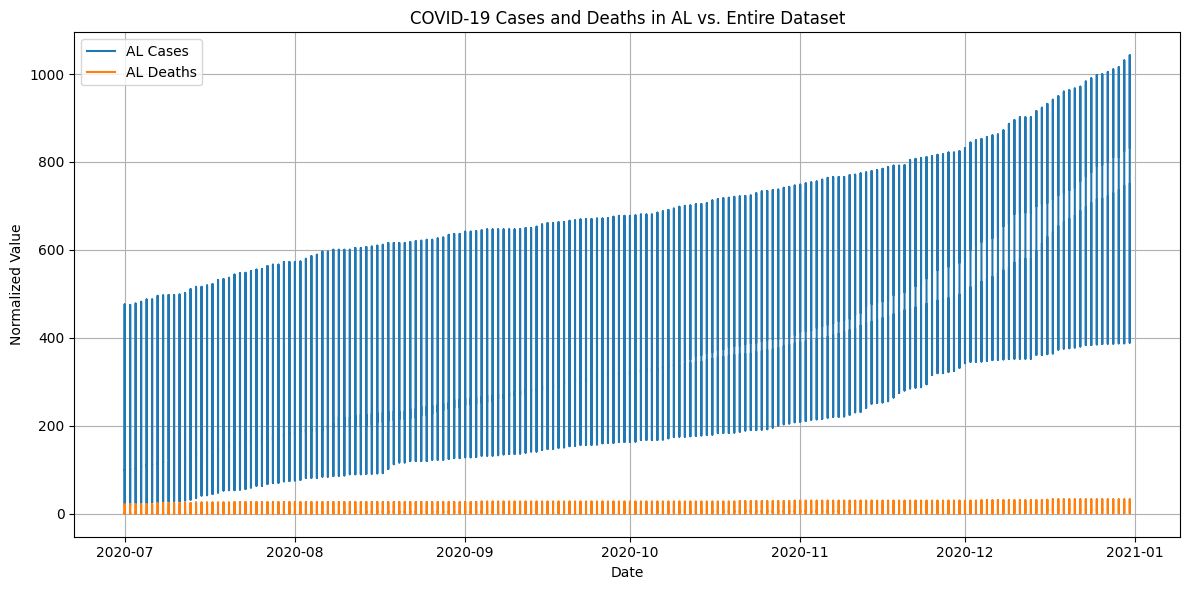

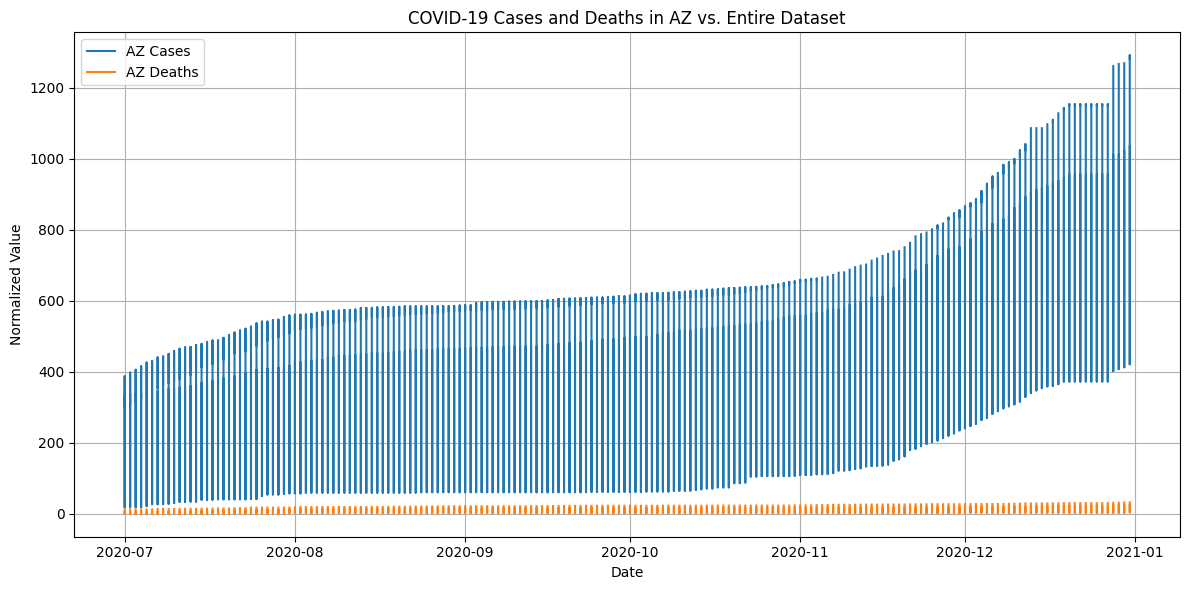

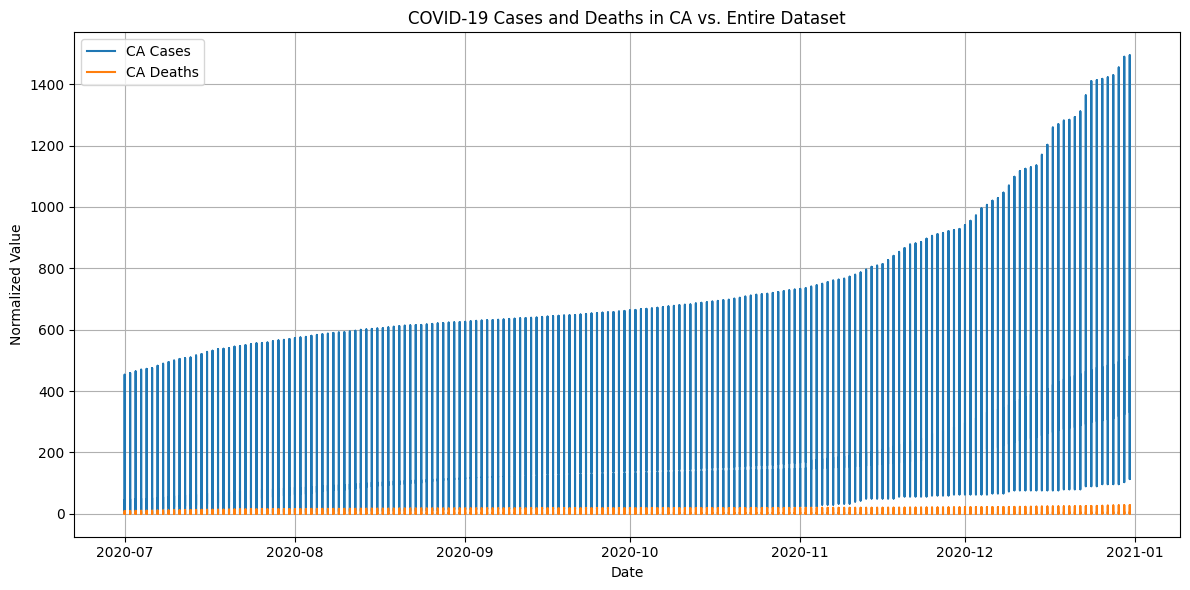

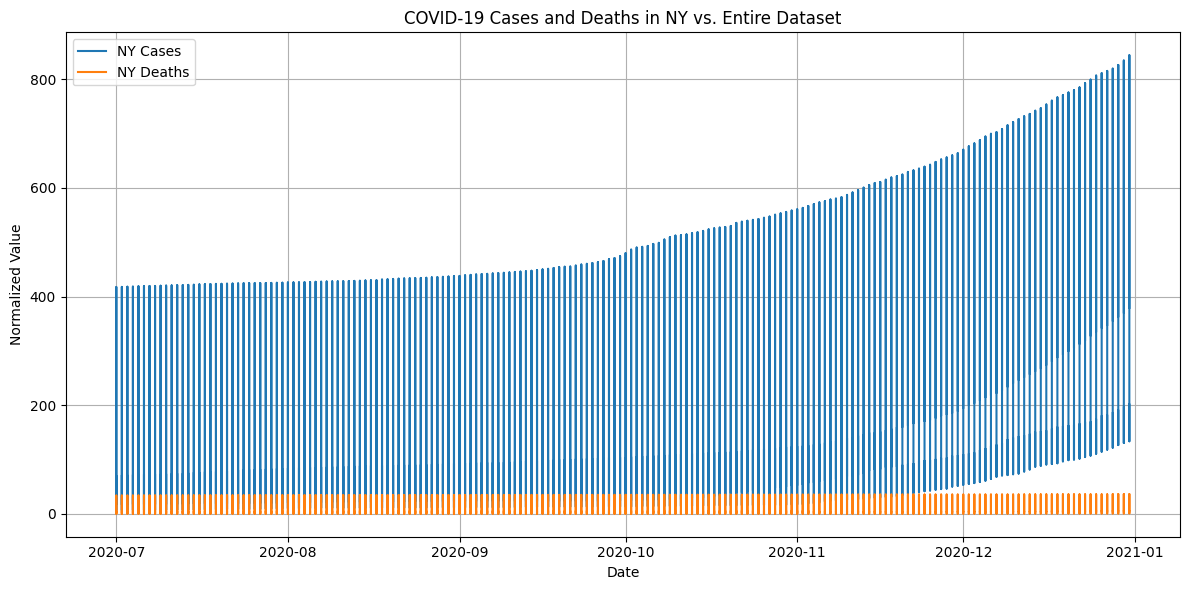

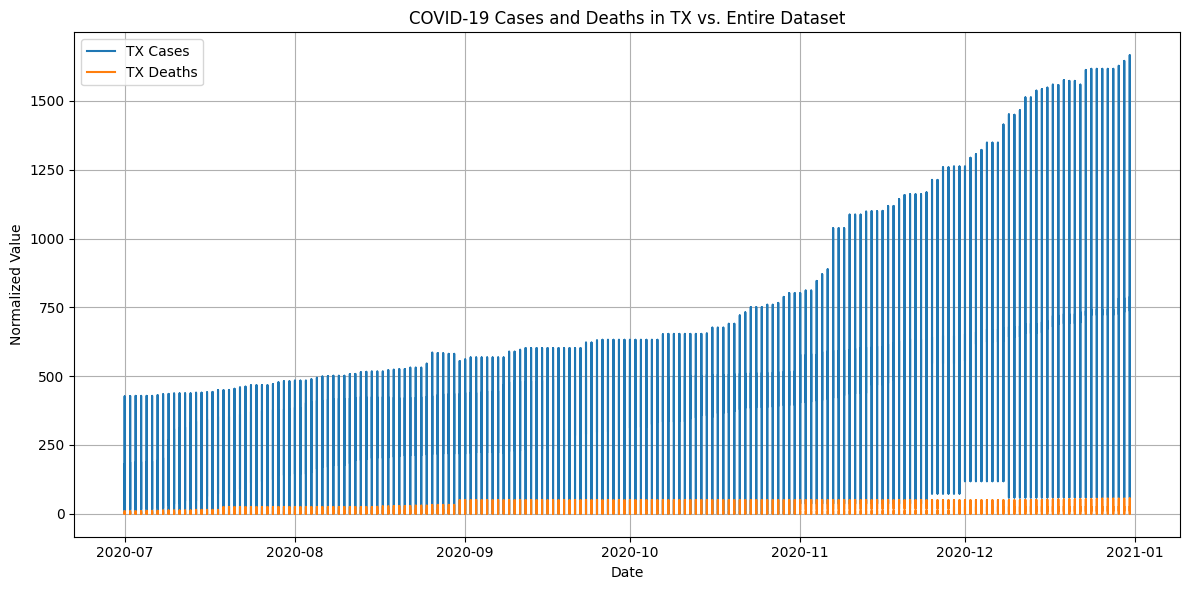

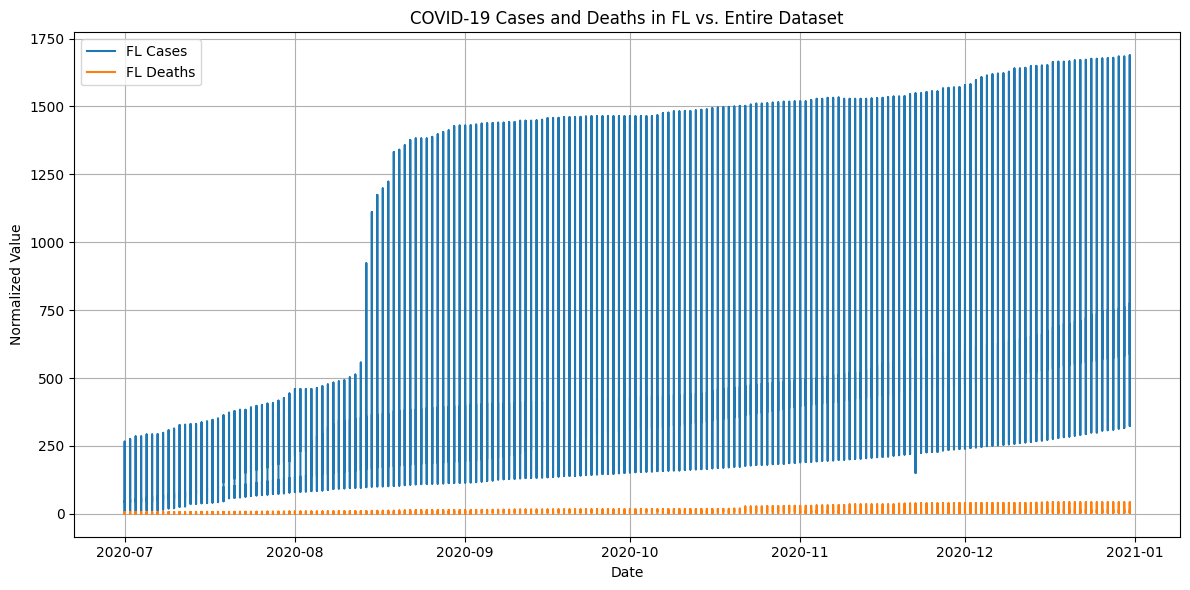

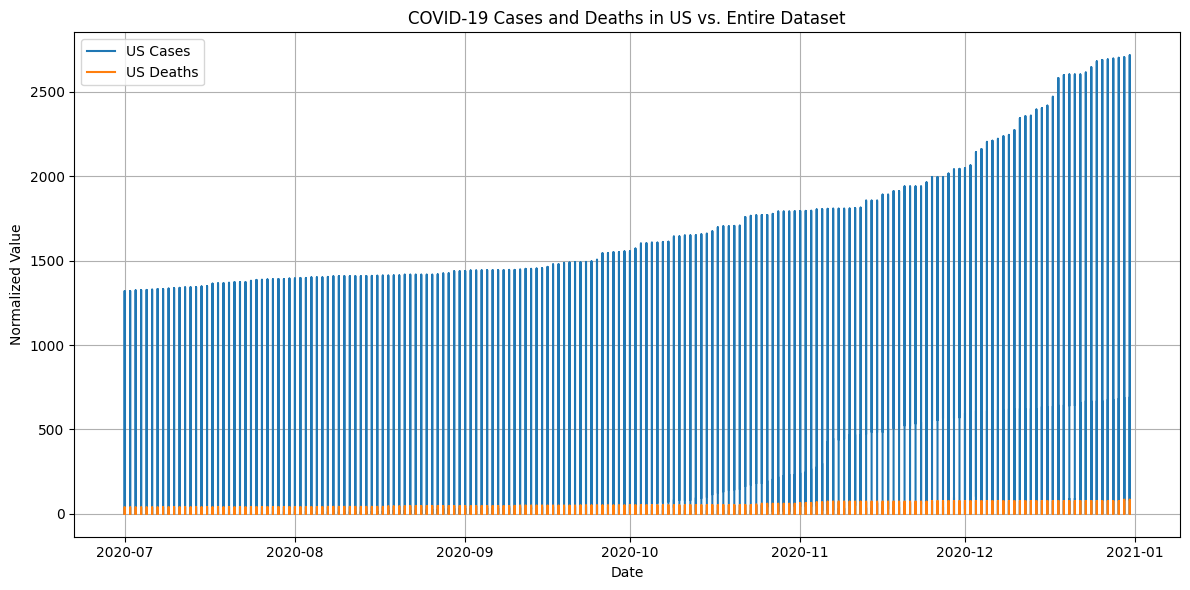

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
states_to_compare = ['AL', 'AZ', 'CA', 'NY', 'TX', 'FL']

cases_deaths['norm_factor'] = cases_deaths['population'] / 10000


cases_deaths['norm_cases'] = cases_deaths['cases'] / cases_deaths['norm_factor']
cases_deaths['norm_deaths'] = cases_deaths['deaths'] / cases_deaths['norm_factor']


for state in states_to_compare + ['US']:
    plt.figure(figsize=(12, 6))
    
    if state == 'US':
        state_data = cases_deaths[~cases_deaths['State'].isin(states_to_compare)]
    else:
        state_data = cases_deaths[cases_deaths['State'] == state]

    plt.plot(state_data['date'], state_data['norm_cases'], label=f'{state} Cases', linestyle='-')
    plt.plot(state_data['date'], state_data['norm_deaths'], label=f'{state} Deaths', linestyle='-')

 
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.title(f'COVID-19 Cases and Deaths in {state} vs. Entire Dataset')


    plt.legend()

    plt.grid(True)
    plt.tight_layout()
    plt.show()


### From above area graphs we can clearly see that end of 2021 he cases and deaths were increasing their is risein the cases, they follow the similar pattern

### Task 3.Identify five counties within a state of AL with high cases and death rates.

In [18]:
import pandas as pd
#separeted albama_data set and loads here
data = pd.read_csv('alabama_data.csv')
data

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
1,1001,Autauga County,AL,1,55869,2020-07-01,553,12
2,1003,Baldwin County,AL,1,223234,2020-07-01,703,10
3,1005,Barbour County,AL,1,24686,2020-07-01,326,1
4,1007,Bibb County,AL,1,22394,2020-07-01,174,1
...,...,...,...,...,...,...,...,...
12507,1125,Tuscaloosa County,AL,1,209355,2020-12-31,18468,218
12508,1127,Walker County,AL,1,63521,2020-12-31,5259,138
12509,1129,Washington County,AL,1,16326,2020-12-31,1184,24
12510,1131,Wilcox County,AL,1,10373,2020-12-31,883,19


In [28]:
#to find high case and deaths i summed the casses and deaths for similar county 
#reset_index is used to give index values
grouped = data.groupby('County Name').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()


In [29]:

grouped.rename(columns={'cases': 'Total Cases', 'deaths': 'Total Deaths'}, inplace=True)

print(grouped)



           County Name  Total Cases  Total Deaths
0      Autauga County        354950          5273
1      Baldwin County       1104113         11894
2      Barbour County        164317          1972
3         Bibb County        142416          2624
4       Blount County        343495          3810
..                 ...          ...           ...
63  Tuscaloosa County       1607240         22163
64      Walker County        474948         15438
65  Washington County        114317          2561
66      Wilcox County         99964          2278
67     Winston County        159212          2679

[68 rows x 3 columns]


In [ ]:
#based on cases nd deaths rates
#descending will be true large to small

#### top 5 counties

In [30]:

grouped['Death Rate'] = grouped['Total Deaths'] / grouped['Total Cases']

sorted_df = grouped.sort_values(by=['Total Cases', 'Death Rate'], ascending=[False, False])

top_five_counties = sorted_df.head(5)
print(top_five_counties)


           County Name  Total Cases  Total Deaths  Death Rate
36   Jefferson County       4095673         66824    0.016316
48      Mobile County       2624869         53391    0.020340
50  Montgomery County       1718621         34592    0.020128
44     Madison County       1663018         15554    0.009353
63  Tuscaloosa County       1607240         22163    0.013789


##### Plot weekly trends (cases and deaths) for the top 5 infected counties. 

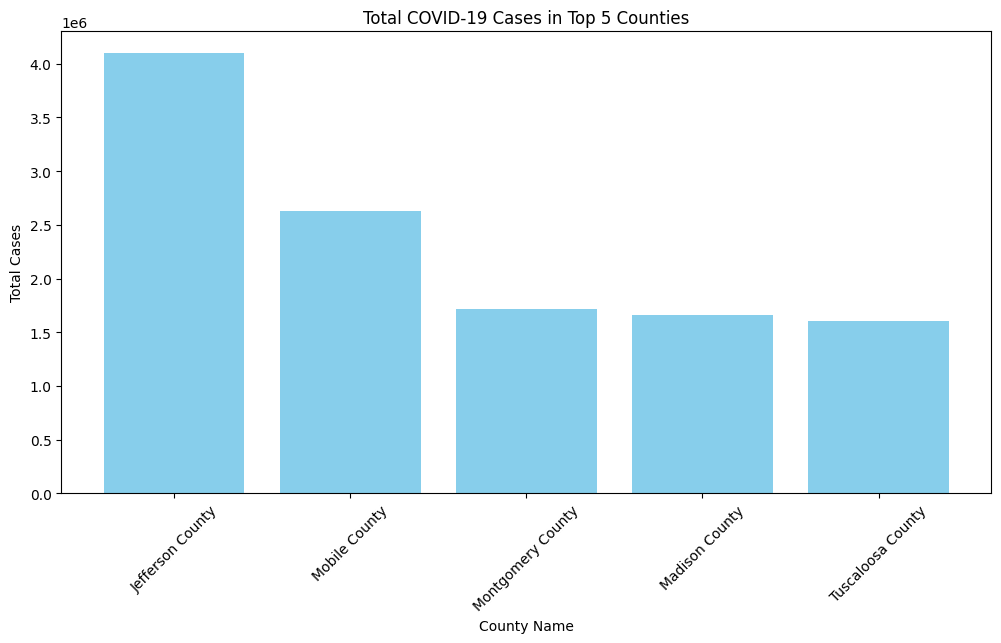

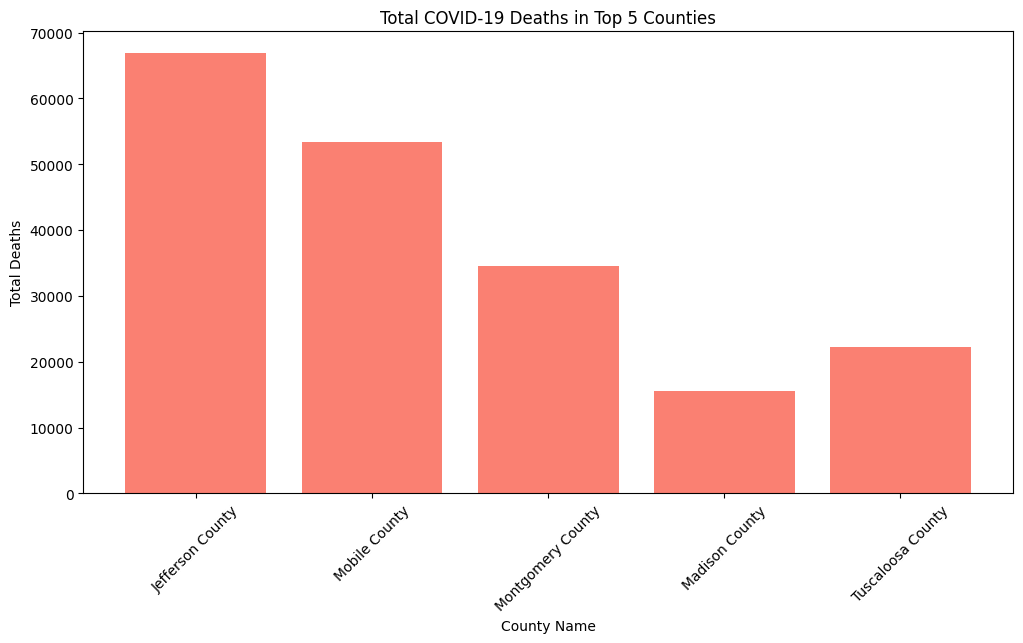

In [73]:
import matplotlib.pyplot as plt

county_names = ['Jefferson County', 'Mobile County', 'Montgomery County', 'Madison County', 'Tuscaloosa County']
total_cases = [4095673, 2624869, 1718621, 1663018, 1607240]
total_deaths = [66824, 53391, 34592, 15554, 22163]
plt.figure(figsize=(12, 6))
plt.bar(county_names, total_cases, color='skyblue')
plt.xlabel('County Name')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases in Top 5 Counties')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 6))
plt.bar(county_names, total_deaths, color='salmon')
plt.xlabel('County Name')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths in Top 5 Counties')
plt.xticks(rotation=45)
plt.show()


### Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [77]:
weekly_data

,date,cases,deaths,Log Cases,Log Deaths,Week Number
0,2020-07-05,81109,2215,199.421761,102.899344,Week 27
1,2020-07-12,135494,3335,286.046873,147.351014,Week 28
2,2020-07-19,170319,3717,294.648397,152.393202,Week 29
3,2020-07-26,204790,4079,301.072917,157.513163,Week 30
4,2020-08-02,236156,4475,306.013807,161.901083,Week 31
5,2020-08-09,268340,4899,310.237237,165.685597,Week 32
6,2020-08-16,294302,5314,313.293513,169.018385,Week 33
7,2020-08-23,310750,5635,315.226336,171.178949,Week 34
8,2020-08-30,330144,5940,317.514495,173.269071,Week 35
9,2020-09-06,350934,6319,319.725654,176.405401,Week 36


In [78]:
top_county_data

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
37,1073,Jefferson County,AL,1,658573,2020-07-01,4436,144
45,1089,Madison County,AL,1,372909,2020-07-01,1084,8
49,1097,Mobile County,AL,1,413210,2020-07-01,3724,138
51,1101,Montgomery County,AL,1,226486,2020-07-01,3890,102
63,1125,Tuscaloosa County,AL,1,209355,2020-07-01,2071,40
...,...,...,...,...,...,...,...,...
12481,1073,Jefferson County,AL,1,658573,2020-12-31,52339,697
12489,1089,Madison County,AL,1,372909,2020-12-31,22197,178
12493,1097,Mobile County,AL,1,413210,2020-12-31,25858,506
12495,1101,Montgomery County,AL,1,226486,2020-12-31,16116,276


### The peak cases and deaths are in bwteen last week of 2020 to the the start of 2021

C:\Users\annem\AppData\Local\Temp\ipykernel_28272\1539061406.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



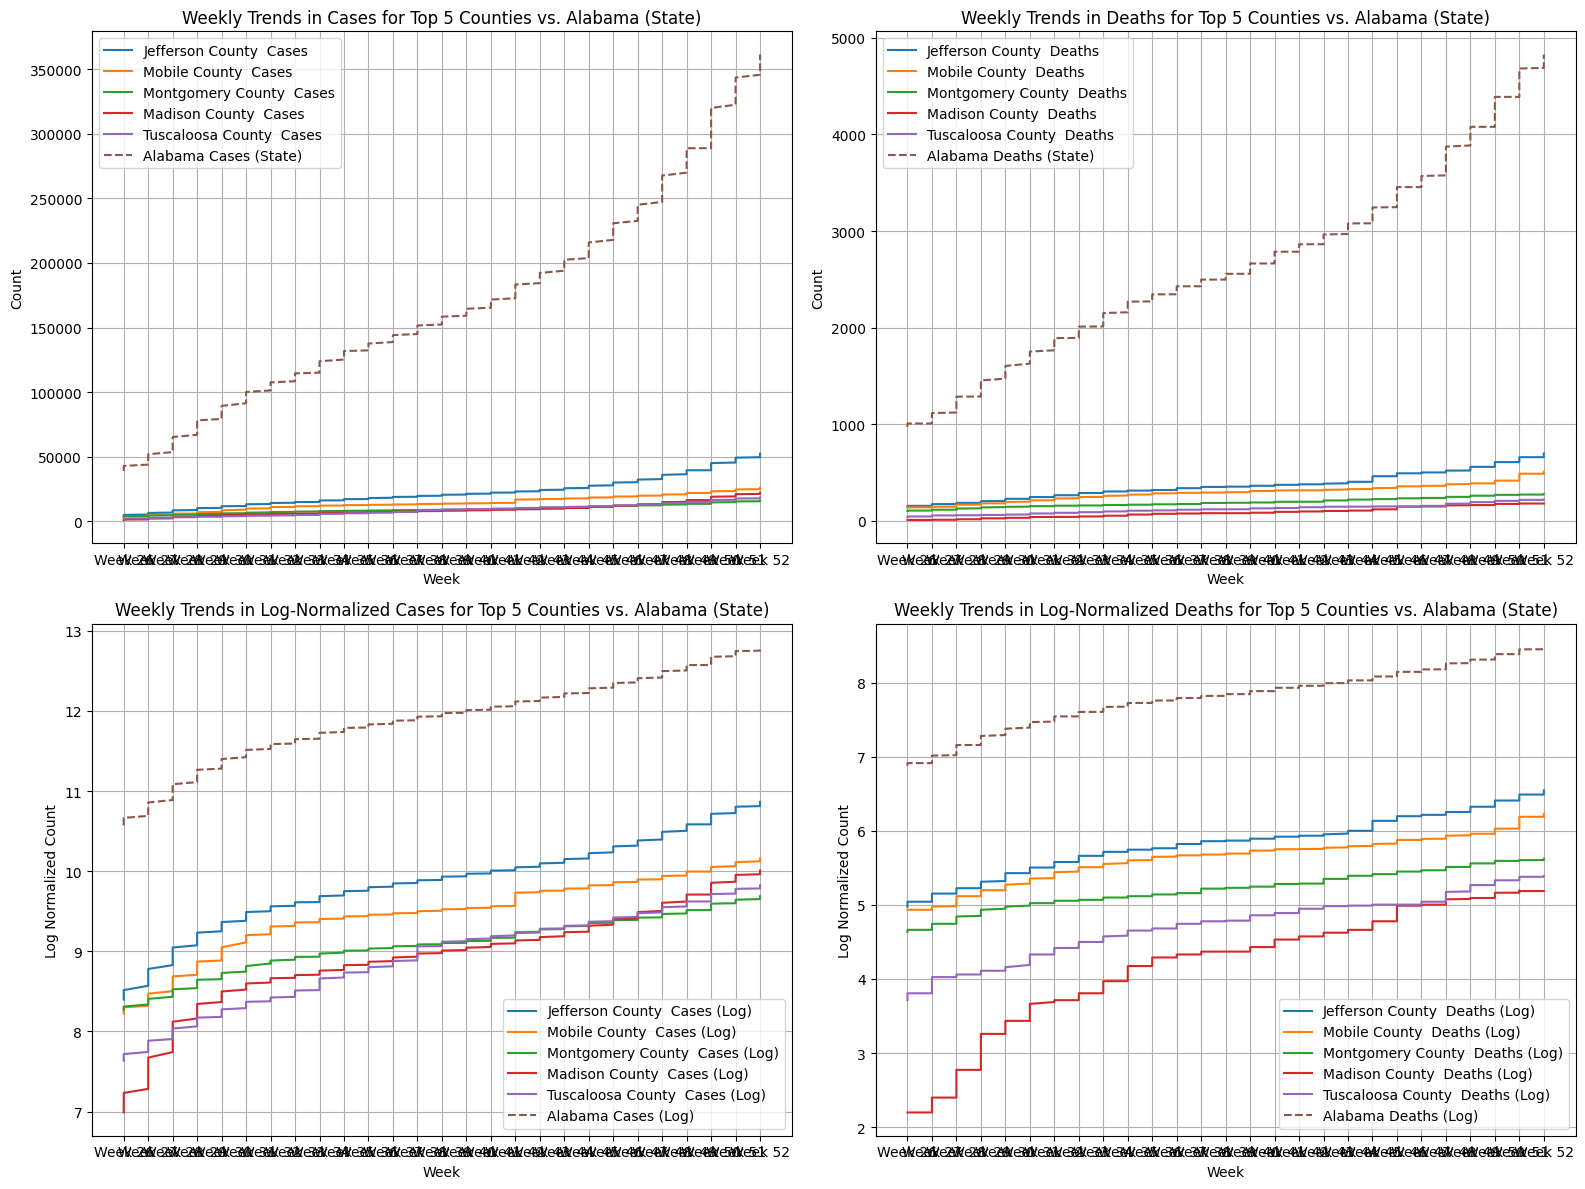

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
state_data = pd.read_csv('alabama_data.csv')

top_county_names = top_five_counties['County Name'].tolist()

top_county_data = state_data[state_data['County Name'].isin(top_county_names)]

top_county_data['date'] = pd.to_datetime(top_county_data['date'])
state_data['date'] = pd.to_datetime(state_data['date'])
weekly_data_county = top_county_data.groupby(['County Name', 'date']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
weekly_data_state = state_data.groupby(['State', 'date']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
weekly_data_county['Log Cases'] = np.log1p(weekly_data_county['cases'])
weekly_data_county['Log Deaths'] = np.log1p(weekly_data_county['deaths'])
weekly_data_state['Log Cases'] = np.log1p(weekly_data_state['cases'])
weekly_data_state['Log Deaths'] = np.log1p(weekly_data_state['deaths'])
weekly_data_county['Week Number'] = weekly_data_county['date'].dt.strftime('Week %U')
weekly_data_state['Week Number'] = weekly_data_state['date'].dt.strftime('Week %U')

fig, axs = plt.subplots(2, 2, figsize=(16, 12))


for county_name in top_county_names:
    county_data = weekly_data_county[weekly_data_county['County Name'] == county_name]
    axs[0, 0].plot(county_data['Week Number'], county_data['cases'], label=f'{county_name} Cases')
    axs[0, 1].plot(county_data['Week Number'], county_data['deaths'], label=f'{county_name} Deaths')

axs[0, 0].plot(weekly_data_state['Week Number'], weekly_data_state['cases'], label='Alabama Cases (State)', linestyle='--')
axs[0, 1].plot(weekly_data_state['Week Number'], weekly_data_state['deaths'], label='Alabama Deaths (State)', linestyle='--')
axs[0, 0].set_xlabel('Week')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Weekly Trends in Cases for Top 5 Counties vs. Alabama (State)')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Weekly Trends in Deaths for Top 5 Counties vs. Alabama (State)')
axs[0, 1].legend()
axs[0, 1].grid(True)
for county_name in top_county_names:
    county_data = weekly_data_county[weekly_data_county['County Name'] == county_name]
    axs[1, 0].plot(county_data['Week Number'], county_data['Log Cases'], label=f'{county_name} Cases (Log)')
    axs[1, 1].plot(county_data['Week Number'], county_data['Log Deaths'], label=f'{county_name} Deaths (Log)')

axs[1, 0].plot(weekly_data_state['Week Number'], weekly_data_state['Log Cases'], label='Alabama Cases (Log)', linestyle='--')
axs[1, 1].plot(weekly_data_state['Week Number'], weekly_data_state['Log Deaths'], label='Alabama Deaths (Log)', linestyle='--')
axs[1, 0].set_xlabel('Week')
axs[1, 0].set_ylabel('Log Normalized Count')
axs[1, 0].set_title('Weekly Trends in Log-Normalized Cases for Top 5 Counties vs. Alabama (State)')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].set_xlabel('Week')
axs[1, 1].set_ylabel('Log Normalized Count')
axs[1, 1].set_title('Weekly Trends in Log-Normalized Deaths for Top 5 Counties vs. Alabama (State)')
axs[1, 1].legend()
axs[1, 1].grid(True)
plt.tight_layout()
plt.show()


### Yeah it follow the same pattern, top infected cases in albama state with the entire albama state..the cases and deaths were increased in the last week

#### finding counties from entire dataset

In [ ]:
Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [89]:
import pandas as pd
cases_deaths = pd.read_csv("merged_cases_deaths.csv")

county_cases = cases_deaths.groupby('County Name')['cases'].sum().reset_index()
sorted_counties = county_cases.sort_values(by='cases', ascending=False)
top_five_counties = sorted_counties.head(5)

print(top_five_counties)


              County Name     cases
1026  Los Angeles County   58633555
436          Cook County   34498673
1126   Miami-Dade County   31595162
1063     Maricopa County   28966985
765        Harris County   24741649


In [99]:
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
1,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
3,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
587507,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
587508,56039,Teton County,WY,56,23464,2020-12-31,2138,4
587509,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
587510,56043,Washakie County,WY,56,7805,2020-12-31,781,19


In [94]:
top_five_counties

,County Name,cases
1026,Los Angeles County,58633555
436,Cook County,34498673
1126,Miami-Dade County,31595162
1063,Maricopa County,28966985
765,Harris County,24741649


In [95]:
top_county_names

['Los Angeles County ',
 'Cook County ',
 'Miami-Dade County ',
 'Maricopa County ',
 'Harris County ']

In [102]:
cases_deaths

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
0,0,Statewide Unallocated,AL,1,0,2020-07-01,0,0
1,0,Statewide Unallocated,AK,2,0,2020-07-01,0,0
2,0,Statewide Unallocated,AZ,4,0,2020-07-01,0,0
3,0,Statewide Unallocated,AR,5,0,2020-07-01,706,0
4,0,Statewide Unallocated,CA,6,0,2020-07-01,21,0
...,...,...,...,...,...,...,...,...
587507,56037,Sweetwater County,WY,56,42343,2020-12-31,2966,16
587508,56039,Teton County,WY,56,23464,2020-12-31,2138,4
587509,56041,Uinta County,WY,56,20226,2020-12-31,1558,7
587510,56043,Washakie County,WY,56,7805,2020-12-31,781,19


In [105]:

top_five_county_names = ['Los Angeles County', 'Cook County', 'Miami-Dade County', 'Maricopa County', 'Harris County']

top_five_county_data = cases_deaths[cases_deaths['County Name'].isin(top_five_county_names)]

In [107]:

cases_deaths = pd.read_csv("merged_cases_deaths.csv")


county_cases = cases_deaths.groupby('County Name')['cases'].sum().reset_index()


sorted_counties = county_cases.sort_values(by='cases', ascending=False)

In [108]:
sorted_counties 

,County Name,cases
1026,Los Angeles County,58633555
436,Cook County,34498673
1126,Miami-Dade County,31595162
1063,Maricopa County,28966985
765,Harris County,24741649
...,...,...
200,Bristol Bay Borough,30
810,Hoonah-Angoon Census Area,0
889,Kalawao County,0
335,City and Borough of Yakutat,0


In [113]:
top_county_names

['Los Angeles County',
 'Cook County',
 'Miami-Dade County',
 'Maricopa County',
 'Harris County']

In [114]:
unique_county_names = cases_deaths['County Name'].unique()
print(unique_county_names)
print(top_county_names)


['Statewide Unallocated' 'Autauga County ' 'Baldwin County ' ...
 'Uinta County ' 'Washakie County ' 'Weston County ']
['Los Angeles County', 'Cook County', 'Miami-Dade County', 'Maricopa County', 'Harris County']


In [123]:
weekly_data_top_counties

,County Name,date,cases,deaths,Log Cases,Log Deaths,Week Number
0,Cook County,2020-07-01,91059,4582,11.419274,8.430109,27
1,Cook County,2020-07-02,91532,4610,11.424455,8.436200,27
2,Cook County,2020-07-03,91938,4619,11.428881,8.438150,27
3,Cook County,2020-07-04,92413,4624,11.434034,8.439232,27
4,Cook County,2020-07-05,92710,4629,11.437242,8.440312,27
...,...,...,...,...,...,...,...
915,Miami-Dade County,2020-12-27,288306,4150,12.571781,8.331105,52
916,Miami-Dade County,2020-12-28,290363,4155,12.578891,8.332308,53
917,Miami-Dade County,2020-12-29,293188,4164,12.588573,8.334472,53
918,Miami-Dade County,2020-12-30,295936,4169,12.597902,8.335671,53


##### yeah it follow the pattern

In [125]:
weekly_data_top_counties

,date,countyFIPS,StateFIPS,population,cases,deaths,Log Cases,Log Deaths,Week Number
0,2020-07-05,703095,700,135814940,1766281,55031,14.384387,10.915670,Week 27
1,2020-07-12,984333,980,190140916,2852080,82131,14.863559,11.316083,Week 28
2,2020-07-19,984333,980,190140916,3338540,89773,15.021044,11.405051,Week 29
3,2020-07-26,984333,980,190140916,3805039,97624,15.151837,11.488889,Week 30
4,2020-08-02,984333,980,190140916,4239064,105483,15.259853,11.566315,Week 31
5,2020-08-09,984333,980,190140916,4585461,113020,15.338401,11.635329,Week 32
6,2020-08-16,984333,980,190140916,4867783,119646,15.398149,11.692301,Week 33
7,2020-08-23,984333,980,190140916,5093891,125782,15.443553,11.742313,Week 34
8,2020-08-30,984333,980,190140916,5284003,130824,15.480195,11.781616,Week 35
9,2020-09-06,984333,980,190140916,5466087,135870,15.514074,11.819461,Week 36


In [133]:
specific_county_data

,countyFIPS,County Name,State,StateFIPS,population,date,cases,deaths
154,4013,Maricopa County,AZ,4,4485414,2020-07-01,52266,817
255,6037,Los Angeles County,CA,6,10039107,2020-07-01,121271,3692
413,12086,Miami-Dade County,FL,12,2716940,2020-07-01,37961,1000
474,13075,Cook County,GA,13,17270,2020-07-01,147,1
509,13145,Harris County,GA,13,35236,2020-07-01,340,9
...,...,...,...,...,...,...,...,...
584793,13075,Cook County,GA,13,17270,2020-12-31,995,23
584828,13145,Harris County,GA,13,35236,2020-12-31,1281,29
584980,17031,Cook County,IL,17,5150233,2020-12-31,393652,8285
585699,27031,Cook County,MN,27,5463,2020-12-31,104,0


In [131]:
unique_county_names = cases_deaths['County Name'].unique()
print(unique_county_names)


['Statewide Unallocated' 'Autauga County ' 'Baldwin County ' ...
 'Uinta County ' 'Washakie County ' 'Weston County ']


In [132]:

specific_county_names = [
    'Los Angeles County',
    'Cook County',
    'Miami-Dade County',
    'Maricopa County',
    'Harris County'
]


cases_deaths['County Name'] = cases_deaths['County Name'].str.strip()

specific_county_data = cases_deaths[cases_deaths['County Name'].isin(specific_county_names)]


In [135]:
weekly_data_state

,State,date,cases,deaths,Log Cases,Log Deaths,Week Number
0,AL,2020-07-05,207750,4977,12.244096,8.512783,Week 27
1,AL,2020-07-12,342835,7505,12.745007,8.923458,Week 28
2,AL,2020-07-19,428290,8563,12.967558,9.055323,Week 29
3,AL,2020-07-26,518700,9709,13.159083,9.180912,Week 30
4,AL,2020-08-02,600043,10895,13.304758,9.296151,Week 31
5,AL,2020-08-09,677408,11955,13.426031,9.388989,Week 32
6,AL,2020-08-16,739520,13070,13.513758,9.478151,Week 33
7,AL,2020-08-23,785588,13764,13.574189,9.529884,Week 34
8,AL,2020-08-30,845527,14589,13.647717,9.588092,Week 35
9,AL,2020-09-06,905704,15621,13.716469,9.656435,Week 36


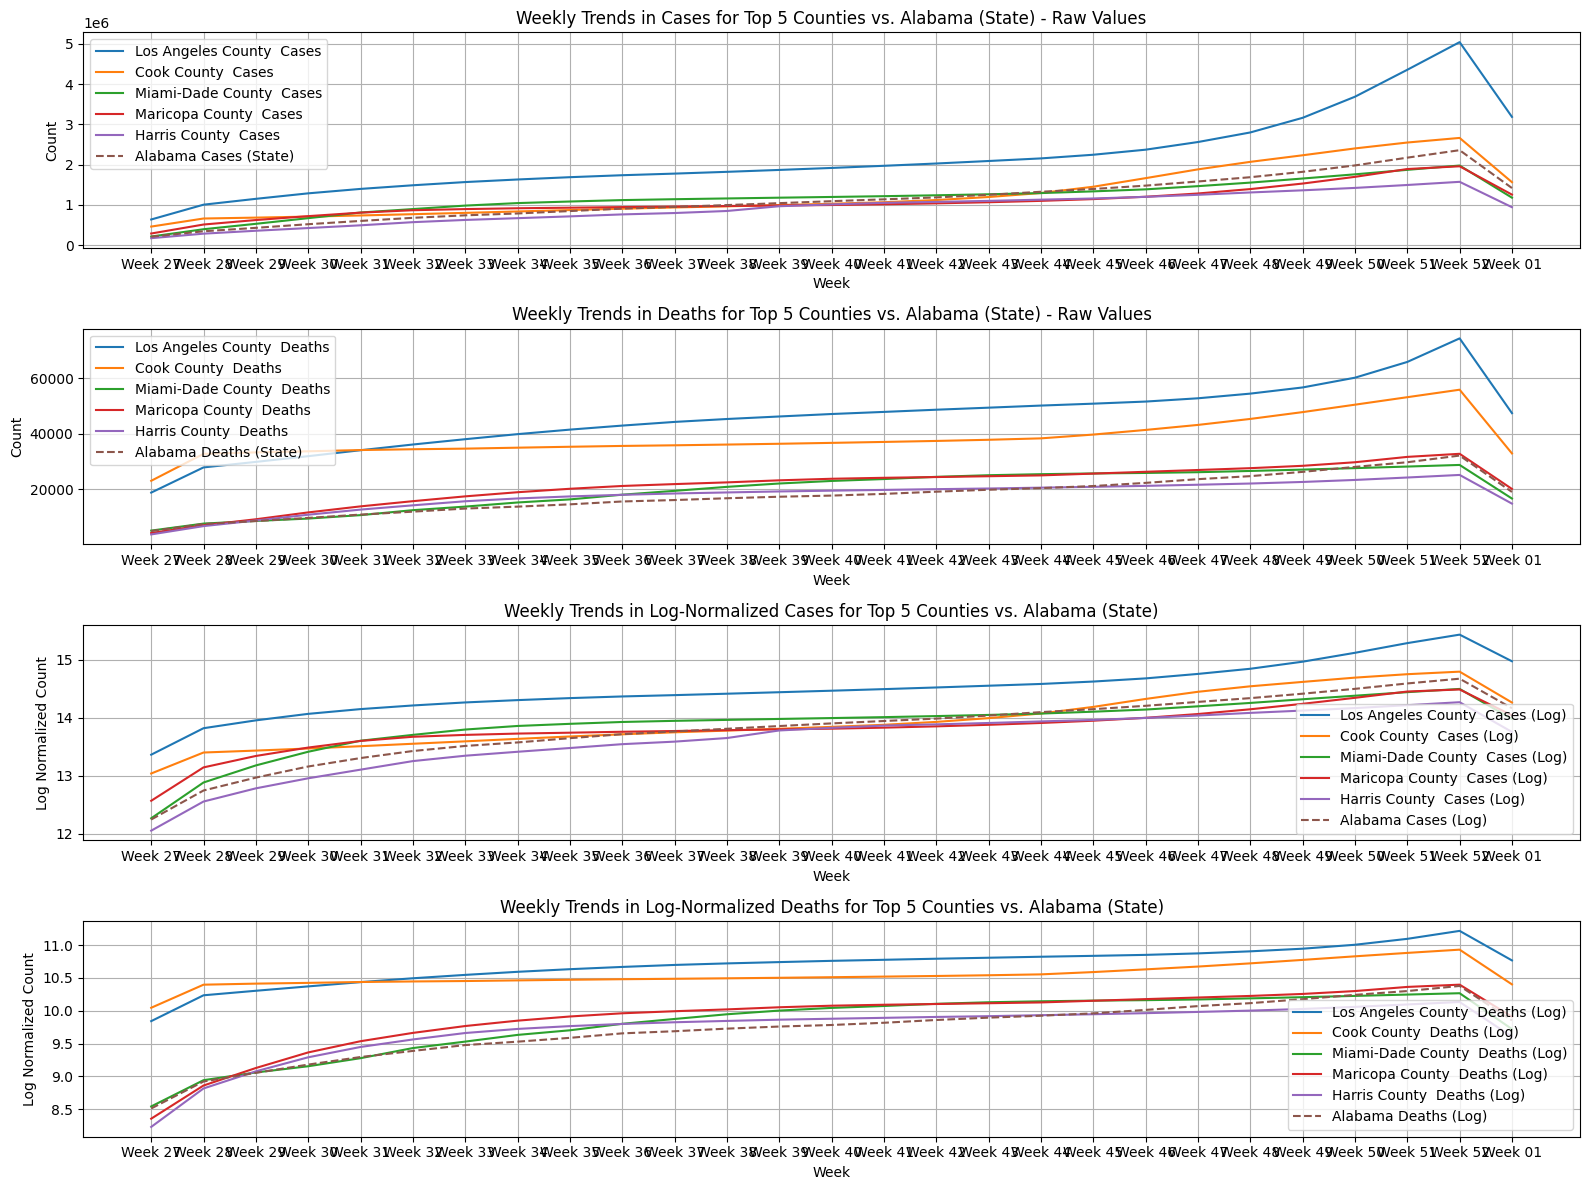

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cases_deaths = pd.read_csv("merged_cases_deaths.csv")

county_cases = cases_deaths.groupby('County Name')['cases'].sum().reset_index()

sorted_counties = county_cases.sort_values(by='cases', ascending=False)
top_five_counties = sorted_counties.head(5)

alabama_data = pd.read_csv("alabama_data.csv")

cases_deaths['date'] = pd.to_datetime(cases_deaths['date'])
alabama_data['date'] = pd.to_datetime(alabama_data['date'])


weekly_data_county = cases_deaths[cases_deaths['County Name'].isin(top_five_counties['County Name'])]
weekly_data_county = weekly_data_county.groupby(['County Name', pd.Grouper(key='date', freq='W')])\
    .agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

weekly_data_alabama = alabama_data.groupby([pd.Grouper(key='date', freq='W')])\
    .agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()
weekly_data_county['Log Cases'] = np.log1p(weekly_data_county['cases'])
weekly_data_county['Log Deaths'] = np.log1p(weekly_data_county['deaths'])
weekly_data_alabama['Log Cases'] = np.log1p(weekly_data_alabama['cases'])
weekly_data_alabama['Log Deaths'] = np.log1p(weekly_data_alabama['deaths'])
weekly_data_county['Week Number'] = weekly_data_county['date'].dt.strftime('Week %U')
weekly_data_alabama['Week Number'] = weekly_data_alabama['date'].dt.strftime('Week %U')

fig, axs = plt.subplots(4, figsize=(16, 12))

for county_name in top_five_counties['County Name']:
    county_data = weekly_data_county[weekly_data_county['County Name'] == county_name]
    axs[0].plot(county_data['Week Number'], county_data['cases'], label=f'{county_name} Cases')
    axs[1].plot(county_data['Week Number'], county_data['deaths'], label=f'{county_name} Deaths')

axs[0].plot(weekly_data_alabama['Week Number'], weekly_data_alabama['cases'], label='Alabama Cases (State)', linestyle='--')
axs[1].plot(weekly_data_alabama['Week Number'], weekly_data_alabama['deaths'], label='Alabama Deaths (State)', linestyle='--')

for county_name in top_five_counties['County Name']:
    county_data = weekly_data_county[weekly_data_county['County Name'] == county_name]
    axs[2].plot(county_data['Week Number'], county_data['Log Cases'], label=f'{county_name} Cases (Log)')
    axs[3].plot(county_data['Week Number'], county_data['Log Deaths'], label=f'{county_name} Deaths (Log)')

axs[2].plot(weekly_data_alabama['Week Number'], weekly_data_alabama['Log Cases'], label='Alabama Cases (Log)', linestyle='--')
axs[3].plot(weekly_data_alabama['Week Number'], weekly_data_alabama['Log Deaths'], label='Alabama Deaths (Log)', linestyle='--')

axs[0].set_xlabel('Week')
axs[0].set_ylabel('Count')
axs[0].set_title('Weekly Trends in Cases for Top 5 Counties vs. Alabama (State) - Raw Values')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Week')
axs[1].set_ylabel('Count')
axs[1].set_title('Weekly Trends in Deaths for Top 5 Counties vs. Alabama (State) - Raw Values')
axs[1].legend()
axs[1].grid(True)

axs[2].set_xlabel('Week')
axs[2].set_ylabel('Log Normalized Count')
axs[2].set_title('Weekly Trends in Log-Normalized Cases for Top 5 Counties vs. Alabama (State)')
axs[2].legend()
axs[2].grid(True)

axs[3].set_xlabel('Week')
axs[3].set_ylabel('Log Normalized Count')
axs[3].set_title('Weekly Trends in Log-Normalized Deaths for Top 5 Counties vs. Alabama (State)')
axs[3].legend()
axs[3].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [137]:
weekly_data_state


,State,date,cases,deaths,Log Cases,Log Deaths,Week Number
0,AL,2020-07-05,207750,4977,12.244096,8.512783,Week 27
1,AL,2020-07-12,342835,7505,12.745007,8.923458,Week 28
2,AL,2020-07-19,428290,8563,12.967558,9.055323,Week 29
3,AL,2020-07-26,518700,9709,13.159083,9.180912,Week 30
4,AL,2020-08-02,600043,10895,13.304758,9.296151,Week 31
5,AL,2020-08-09,677408,11955,13.426031,9.388989,Week 32
6,AL,2020-08-16,739520,13070,13.513758,9.478151,Week 33
7,AL,2020-08-23,785588,13764,13.574189,9.529884,Week 34
8,AL,2020-08-30,845527,14589,13.647717,9.588092,Week 35
9,AL,2020-09-06,905704,15621,13.716469,9.656435,Week 36


## It follow sthe pattern the cases were increased from the end of 2020 to the start of 2021, 
### The reasons might be  colder weather during the fall and winter months can drive people indoors where the virus can spreaded more easily in enclosed spaces with poor ventilation.
### New variants of the SARS-CoV-2 virus were identified in late 2020. Some of these variants were more transmissible, which could have contributed to increased cases.
### During the holiday season, many people tend to gather with family and friends. These gatherings can facilitate the spread of the virus, especially if public health guidelines such as mask-wearing and social distancing are not followed.